# Integrated Simulations

In [1]:
import os; from os import listdir; from os.path import isfile, join
import re  
#from skimage import io 
from skimage.io import imread
# To manipulate arrays
import numpy as np 
import random
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import scipy
import pandas as pd
import shutil
import pathlib
import tifffile
import sys
from skimage.exposure import rescale_intensity
import rsnapsim as rss
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
masks_dir = current_dir.parents[1].joinpath('DataBases','masks_for_sim_cell')
#trajectories_dir = current_dir.parents[1].joinpath('DataBases','rsnapsim_simulations','bactin_ssa.npy')
trajectories_dir = current_dir.parents[1].joinpath('DataBases','rsnapsim_simulations','kdm5b_ssa.npy')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
gene_file = current_dir.parents[1].joinpath('DataBases','gene_files','KDM5B_withTags.txt')

In [3]:
#import rsnaped as rsp
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
rsp.Banner(show=True).print_banner()

 
  ██████╗░░██████╗███╗░░██╗░█████╗░██████╗░███████╗██████╗░ 
  ██╔══██╗██╔════╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗ 
  ██████╔╝╚█████╗░██╔██╗██║███████║██████╔╝█████╗░░██║░░██║ 
  ██╔══██╗░╚═══██╗██║╚████║██╔══██║██╔═══╝░██╔══╝░░██║░░██║ 
  ██║░░██║██████╔╝██║░╚███║██║░░██║██║░░░░░███████╗██████╔╝ 
                            by : L. Aguilera, and B. Munsky 


In [4]:
# List all video in dir
video_dir
list_files_names = sorted([f for f in listdir(video_dir) if isfile(join(video_dir, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_dir.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
path_files

['/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_0.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_1.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_2.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_3.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_4.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_5.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_6.tif',
 '/home/luisub/Desktop/rsnaped/DataBases/videos_for_sim_cell/cell_shape_7.tif']

In [5]:
# Generating masks
list_masks=[]
list_selected_image =[]
for i in range(0, len(path_files) ):
    file_path = pathlib.Path(path_files[i])
    video = imread(str(file_path)) 
    selected_image = np.max(video[:, :, :, 1],axis=0) # selecting for the mask the first time point
    selected_masks = rsp.Cellpose(selected_image, num_iterations = 4, channels = [0,0], diameter = 100, model_type = 'cyto', selection_method = 'max_cells').calculate_masks() # options are 'max_area' or 'max_cells'
    selected_mask  = rsp.CellposeSelection(selected_masks, selected_image, selection_method = 'max_area').select_mask()
    destination_name_and_path = masks_dir.joinpath( 'mask_'+file_path.name)
    selected_mask_uint8 = np.uint8(selected_mask)
    list_masks.append(selected_mask_uint8)
    list_selected_image.append(selected_image)
    tifffile.imwrite(destination_name_and_path, selected_mask_uint8)

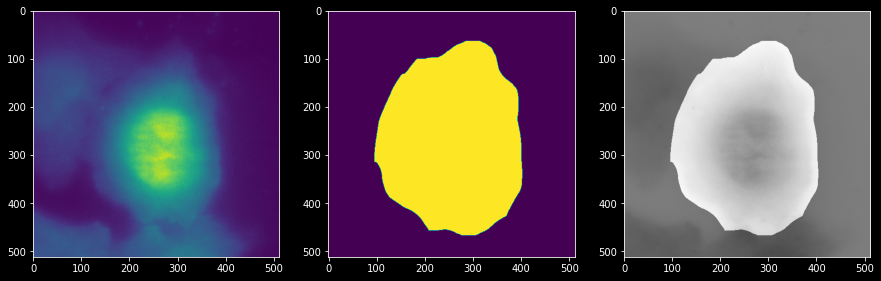

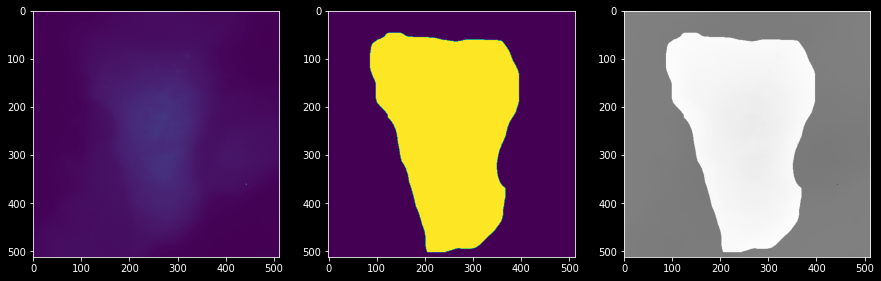

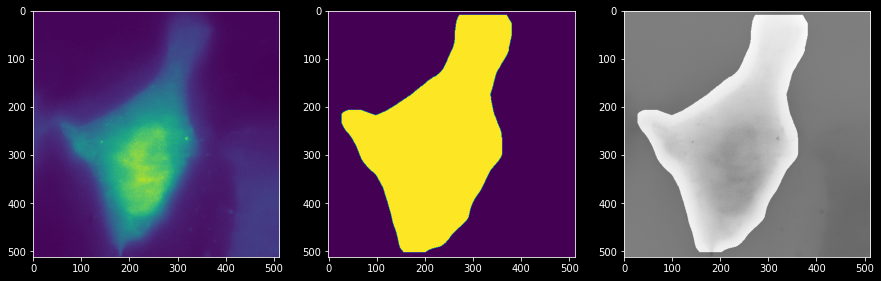

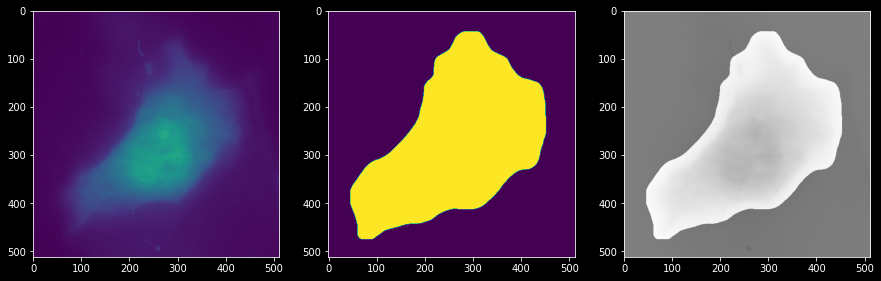

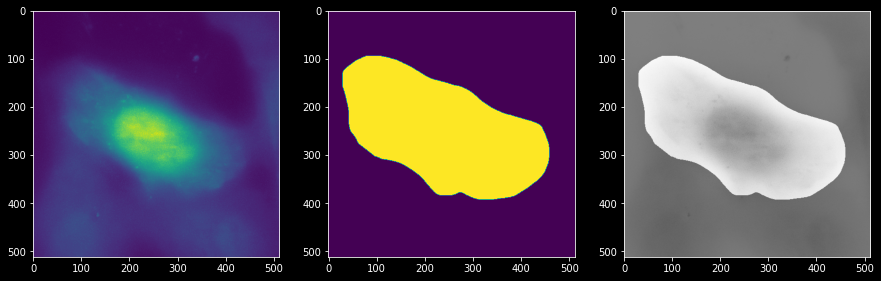

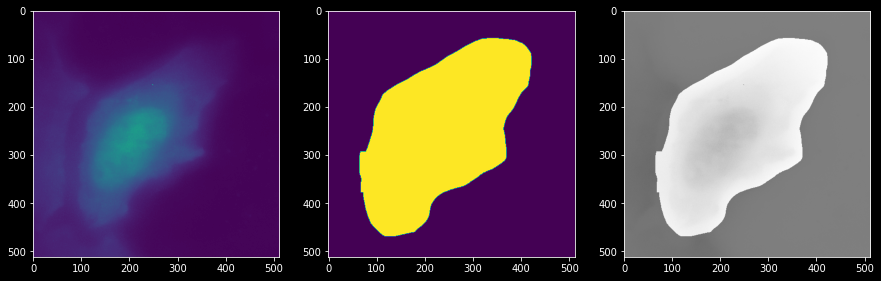

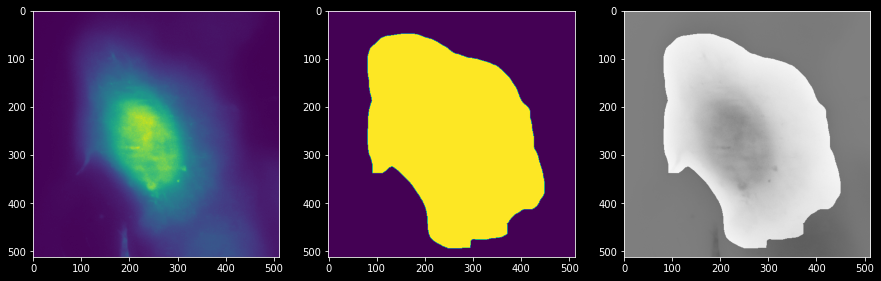

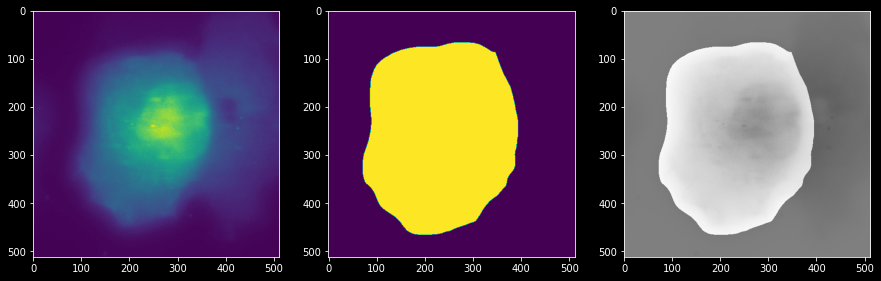

In [6]:
for i in range(0, len(path_files) ):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes[0].imshow(list_selected_image[i])
    axes[1].imshow(list_masks[i])
    axes[2].imshow(list_selected_image[i],cmap='gray_r')
    axes[2].imshow(list_masks[i],alpha=0.5,cmap='gray')
    plt.show()